<a href="https://colab.research.google.com/github/KD-kAnEsHi/Mini-Projects/blob/main/PyTorch_Workflow_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [17]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [3]:
# Generates data, we will make use of to run a regression and gradient model

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias
x[:10], y[:10]

# x: features
# y: w-weights, x-features, b-bias

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# splitting the data into testing and training set

train_split = int(0.8 * len(x)) # gets how much val of the list makes up 80% of it
x_traing, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_test), len(y_test), len(x_traing), len(y_train)

(10, 10, 40, 40)

In [5]:
# making use of matplotlin to visualize data
def plot_predictions(train_data=x_traing,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  """
    Plotsl training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot test and traning data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

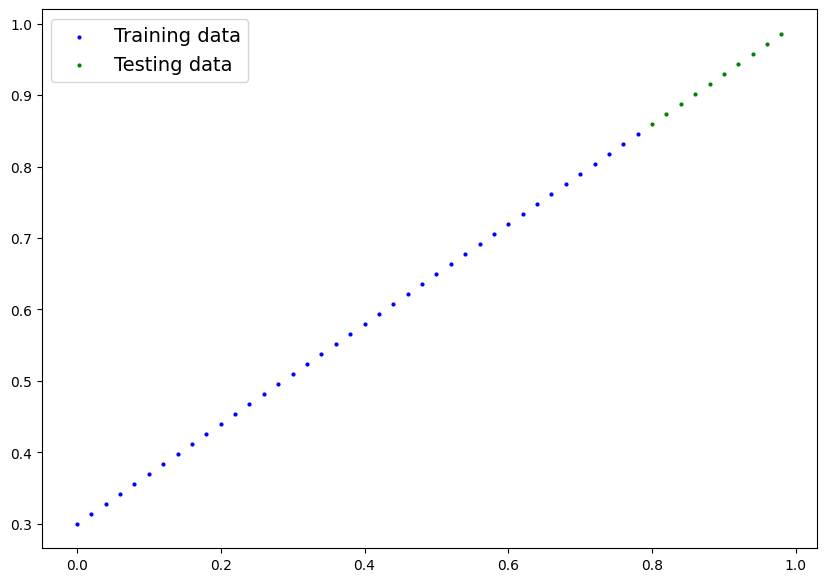

In [6]:
plot_predictions()

IMPLEMENTATION:

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, # randoms weight
                                            requires_grad=True, # we need the gradient for training
                                            dtype=torch.float)) #  sets the fl to float32

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

torch.nn: contains building block of computation graphs

torch.nn.pramater: stores the tensore which may be used wiht nn.module

torch.nn.module: base class for all NN modules, need forward()

torch.opetim: contains a variety of optimization algorithm, helps with computatin

requires_grad = True -
   > Means PyTorch will track the gradient of this specific parameter for use wiht torch.autograd and gradient descent

In [9]:
# set a manual seed of 42, since nn.Parameter are randomly initialized
torch.manual_seed(20)

# creates an instance of the model
model_0 = LinearRegressionModel()

# shows the parameters within the nn.Modules
list(model_0.parameters())
#list(model_0.bias), list(model_0.weights)

[Parameter containing:
 tensor([-1.2061], requires_grad=True),
 Parameter containing:
 tensor([0.0617], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.2061])), ('bias', tensor([0.0617]))])

In [10]:
with torch.inference_mode():
  y_preds = model_0(x_test)

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.9032],
        [-0.9273],
        [-0.9514],
        [-0.9756],
        [-0.9997],
        [-1.0238],
        [-1.0479],
        [-1.0720],
        [-1.0962],
        [-1.1203]])


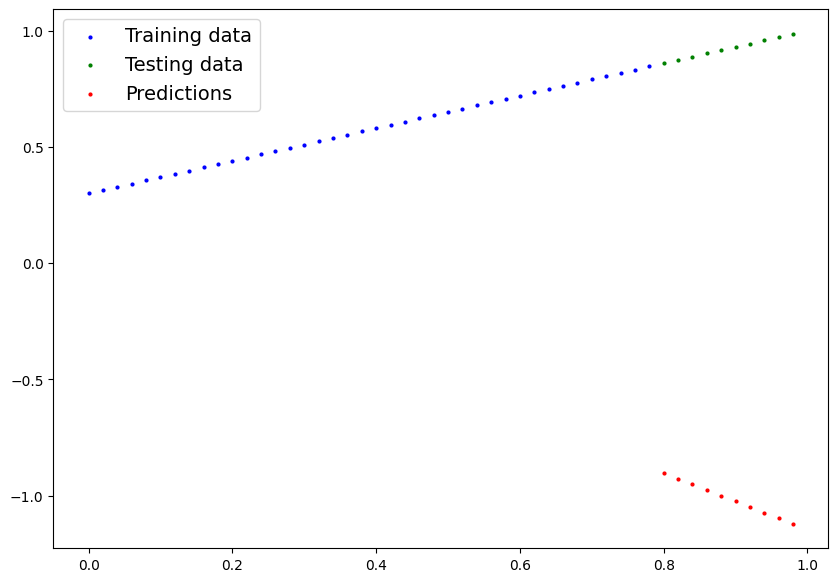

In [12]:
plot_predictions(predictions=y_preds)

Loss functions: Measure how close/wrong the models predictions are froim the truth labels


Optimizer: Tell the mdoe how to update thits internal parameters to best lower the loss function


lr: Learning rate we want the optimizer to update the paramaters at

In [13]:
# Making a loss function and determining the best learning rate

loss_fn = nn.L1Loss()       # MAE Loss

optimizer = torch.optim.SGD(params=model_0.parameters(), # specifies that the model should optimize the paramters, can be changed to weight etc,,
                            lr=0.01)                     # learning rate, *** manually changed to find the most optimum ***

PyTorch Song
>
>
It's train time! do the forward pass, calculate the loss, optimizer zero grad,
losssss backwards!
Optimizer step step step
Let's test now! with torch no grad: do the forward pass,
alculate the loss,
vatch it go down down down!

Training Steps

Forward Pass
>
Calculate the loss
>
Zero Guidients - set them to zero
>
Perfrom backpropagation
>
Gradient descent (update the optimizer)

In [ ]:
# training loop example
for epoch in range(epochs):         # Iterate through the epochs (set by user)

  model_0.train()                   # put the model in training mode (sound cool lol)
  y_pred = model_0(x_traing)        # forward pass (call the forward pass method and goes through the created architecture)
  loss = loss_fn(y_pred, y_test)    # calculate the loss function by comparing predicted values with the test values

  optimizer.zero_grad()             # set tehh gradient to 0, before backpropagation.
  loss.backward()                   # backpropagation (Compute the gradient with of every paragramter)
  optimizer.step()                  # gradient descent (update the model paramter with better ones, based off of new_gradient ,ade after making adjustments)







# testing loop example
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):

  model_0.train()                     # put the model in evaluation mode (sound cool lol)

  with torch.inference_mode():       # torn ON 'torch.inference_mode()' context manager to disable stuff like gradient tracking

    test_pred = model_0(x_test)       #
    test_loss = loss_fn(test_pred, y_test)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




In [21]:
torch.manual_seed(42)


epochs = 100                     # how many loops the program will go through

# empy loss list to track each valuee, train and test
train_loss_val = []
test_loss_val = []
epoch_count = []                 # use to track loss to a speficic epoch

for epoch in range(epochs):

  # Now lets train the model

  model_0.train()                 # Put the model in training mode

  y_pred = model_0(x_traing)      # forward pass on training using forward() method inside the model class
  #print(y_pred)

  loss = loss_fn(y_pred, y_train) # Calculate the loss (difference between the prediciton and ground truth)
  optimizer.zero_grad()           # Set the optimizer to zero, before back-propagation

  loss.backward()
  optimizer.step()

  model_0.eval()                  # Put the model in evaluation mode

  with torch.inference_mode():    # perform predictions on test data ( check wether model is getting better or worse)
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_val.append(loss.detach().numpy())
      test_loss_val.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.22814814746379852 | MAE Test Loss: 0.5330759286880493
Epoch: 10 | MAE Train Loss: 0.22470512986183167 | MAE Test Loss: 0.5248035788536072
Epoch: 20 | MAE Train Loss: 0.22127051651477814 | MAE Test Loss: 0.5165311694145203
Epoch: 30 | MAE Train Loss: 0.21783173084259033 | MAE Test Loss: 0.5082588791847229
Epoch: 40 | MAE Train Loss: 0.21440310776233673 | MAE Test Loss: 0.5006732940673828
Epoch: 50 | MAE Train Loss: 0.21096685528755188 | MAE Test Loss: 0.49240097403526306
Epoch: 60 | MAE Train Loss: 0.20752958953380585 | MAE Test Loss: 0.48481544852256775
Epoch: 70 | MAE Train Loss: 0.20410113036632538 | MAE Test Loss: 0.476543128490448
Epoch: 80 | MAE Train Loss: 0.2006632387638092 | MAE Test Loss: 0.46827077865600586
Epoch: 90 | MAE Train Loss: 0.1972276270389557 | MAE Test Loss: 0.46068525314331055


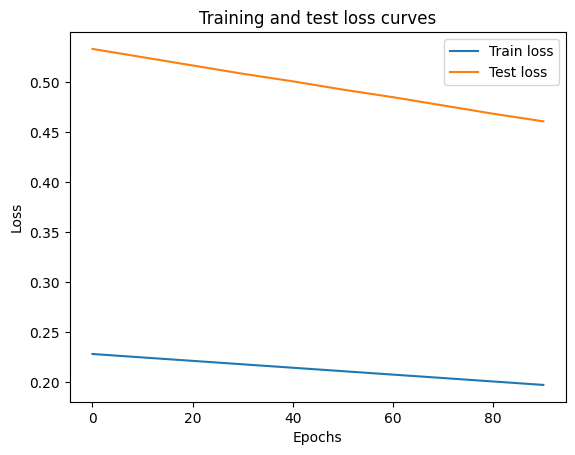

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([-0.2643])), ('bias', tensor([0.7047]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [29]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_pre = model_0(x_test)
y_pre

tensor([[0.4933],
        [0.4880],
        [0.4827],
        [0.4774],
        [0.4721],
        [0.4668],
        [0.4616],
        [0.4563],
        [0.4510],
        [0.4457]])

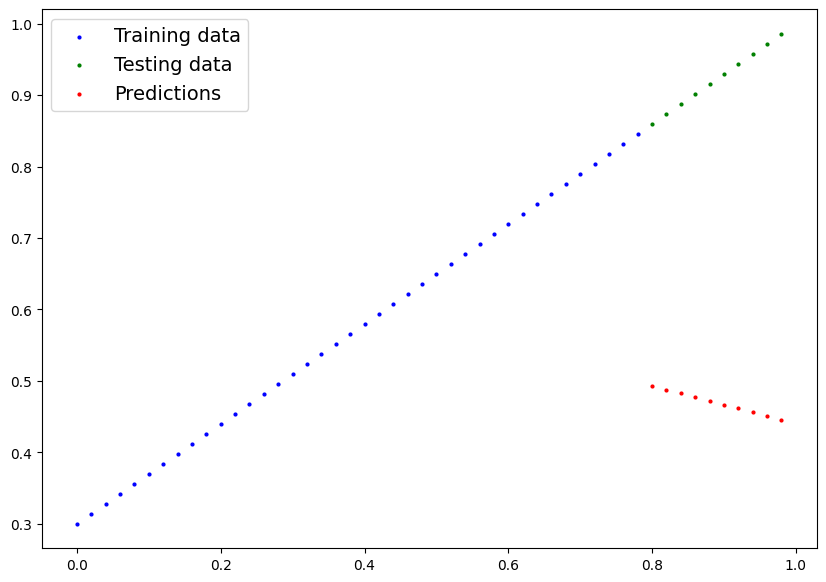

In [30]:

plot_predictions(predictions=y_pre)

In [34]:
from pathlib import Path
# saving the models in a file

# creat a dir names models
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# creat a file in which the docs will be saved in
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# Save the model stat_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),                # Gets the trained weights using state_dict
           f=MODEL_SAVE_PATH)                       # Stores the created weights inside of the .pth file, F - file path

Saving model to: models/01_pytorch_workflow.pth


In [35]:
# Loading stored weight, saved in a file

# In order get the stored weight we need to creat a new instance of model (with random weights and update them)
loaded_model_0 = LinearRegressionModel()

# load the state_dict of the saved model, get the saved weight and update the weights of the current model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [36]:
# Inference: evaluating the model and makingprediction on test data haah

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_pred = loaded_model_0(x_test)  # call the forward pass on the test data with loaded model

In [37]:
# compared prediciton from stored weight to the weight before it was stored
y_pre == loaded_model_0_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Exercise:

All exercises have been inspired from code throughout the notebook.
>
There is one exercise per major section.
>
You should be able to complete them by referencing their specific section.
>
> Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).
>
Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.
>
Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
>
Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
>
Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
>
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.
>
Make predictions with the trained model on the test data.
>
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
>
Save your trained model's state_dict() to file.
Create a new instance of your model class you made in  and load in the state_dict() you just saved to it.
>
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from



In [38]:
# creat a dataset:
weight = 0.3
bias = 0.9

start = 0
end = 50
step = 0.2

torch.manual_seed(42)
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias

In [41]:
train_split = int(0.8 * len(y))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [43]:
def plot_graph(x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train, y_pred=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train, y_train, c="b", s=4, label="Training data")
  plt.scatter(x_test, y_test, c="g", s=4, label="Testing data")
  if y_pred is not None:
    plt.scatter(x_test, y_pred)

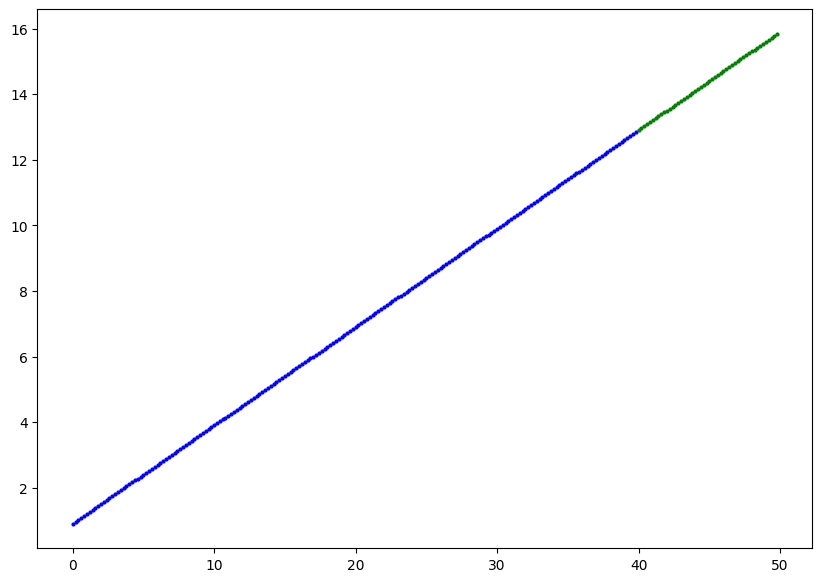

In [44]:
plot_graph()

In [53]:
class BaseModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    return self.weight * x + self.bias

In [54]:
new_model = BaseModel()
new_model.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [55]:
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=new_model.parameters(), lr=0.05)

In [60]:
epoch = 300

loss_test = []
loss_train = []
epoch_history = []

for epok in range(epoch):

  new_model.train()               # Sets the model to training mode
  y_pred = new_model(x_train)     # make predictison on x-train

  new_loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()           # sets the weighs to 0, before doing backward propagation
  new_loss.backward()             # back-propagation
  optimizer.step()                # change the gradients based off of the ppredicted resuls

  new_model.eval()                # set the model to evaluation mode
  with torch.inference_mode():
    y_pred = new_model(x_train)
    test_loss = loss_fn(y_test, y_test)

    if epok % 20 == 0:
      epoch_history.append(epok)
      print(f"training loss for {epok} - {loss_train.append(new_loss.detach().numpy())}")
      print(f"test loss for {epok} - {loss_test.append(test_loss.detach().numpy())}")

training loss for 0 - None
test loss for 0 - None
training loss for 20 - None
test loss for 20 - None
training loss for 40 - None
test loss for 40 - None
training loss for 60 - None
test loss for 60 - None
training loss for 80 - None
test loss for 80 - None
training loss for 100 - None
test loss for 100 - None
training loss for 120 - None
test loss for 120 - None
training loss for 140 - None
test loss for 140 - None
training loss for 160 - None
test loss for 160 - None
training loss for 180 - None
test loss for 180 - None
training loss for 200 - None
test loss for 200 - None
training loss for 220 - None
test loss for 220 - None
training loss for 240 - None
test loss for 240 - None
training loss for 260 - None
test loss for 260 - None
training loss for 280 - None
test loss for 280 - None


In [62]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(new_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9
